### import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

### Problem Statement

### Data Gathering 

In [2]:
df= pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Exploratory Data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### independent and dependent variable

In [5]:
x= df.drop('target',axis=1)
y = df.target

In [6]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)


### Model Evaluation

In [7]:
rf_clf= RandomForestClassifier(random_state=1)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [8]:
rf_clf.score(x_train,y_train)

1.0

In [9]:
rf_clf.score(x_test,y_test)

0.8032786885245902

### feature importance

In [10]:
rf_clf.feature_importances_

array([0.07813526, 0.04206087, 0.16579998, 0.07476748, 0.0758662 ,
       0.00827565, 0.02013861, 0.12772212, 0.06949599, 0.09956583,
       0.04677439, 0.11666925, 0.07472838])

<Axes: >

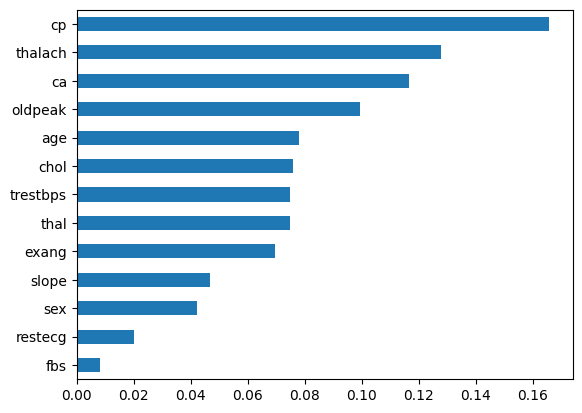

In [11]:
s1= pd.Series(rf_clf.feature_importances_,index= x.columns)
s1.sort_values().plot(kind= 'barh')

### Training Data Evaluation

In [15]:
y_pred_train= rf_clf.predict(x_train)
confu_matrics= confusion_matrix(y_train,y_pred_train)
print("confu_matrics:\n",confu_matrics)
accuracy= accuracy_score(y_train,y_pred_train)
print("accuracy:",accuracy)
class_report = classification_report(y_train,y_pred_train)
print("class_report:\n",class_report)

confu_matrics:
 [[108   0]
 [  0 134]]
accuracy: 1.0
class_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       134

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



### Testing Data Evaluation

In [16]:
y_pred= rf_clf.predict(x_test)
confu_matrics= confusion_matrix(y_test,y_pred)
print("confu_matrics:\n",confu_matrics)
accuracy= accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)
class_report = classification_report(y_test,y_pred)
print("class_report:\n",class_report)

confu_matrics:
 [[21  9]
 [ 3 28]]
accuracy: 0.8032786885245902
class_report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



### Hyperparameter Tuning

In [ ]:
rf_clf= RandomForestClassifier(max_features='sqrt',bootstrap=True,oob_score=True,n_jobs=-1, random_state= 0)
hyp_grid= {'n_estimators':np.arange(100,200,20),
    'criterion':['gini','entropy'],
    'max_depth': np.arange(4,8),
    'min_samples_split':np.arange(4,8),
    'min_samples_leaf':np.arange(4,6)}
rf_gscv= GridSearchCV(rf_clf,hyp_grid,cv=3)
rf_gscv.fit(x_train,y_train)

In [16]:
rf_gscv.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=4,
                       n_estimators=180, n_jobs=-1, oob_score=True,
                       random_state=0)

In [17]:
rf_clf= rf_gscv.best_estimator_
rf_clf.fit(x_train,y_train)


RandomForestClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=4,
                       n_estimators=180, n_jobs=-1, oob_score=True,
                       random_state=0)

### Training Data Evaluation

In [18]:
y_pred_train= rf_clf.predict(x_train)
confu_matrics= confusion_matrix(y_train,y_pred_train)
print("confu_matrics:\n",confu_matrics)
accuracy= accuracy_score(y_train,y_pred_train)
print("accuracy:",accuracy)
class_report = classification_report(y_train,y_pred_train)
print("class_report:\n",class_report)

confu_matrics:
 [[ 92  16]
 [  6 128]]
accuracy: 0.9090909090909091
class_report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89       108
           1       0.89      0.96      0.92       134

    accuracy                           0.91       242
   macro avg       0.91      0.90      0.91       242
weighted avg       0.91      0.91      0.91       242



### Testing Data Evaluation

In [19]:
y_pred= rf_clf.predict(x_test)
confu_matrics= confusion_matrix(y_test,y_pred)
print("confu_matrics:\n",confu_matrics)
accuracy= accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)
class_report = classification_report(y_test,y_pred)
print("class_report:\n",class_report)

confu_matrics:
 [[21  9]
 [ 4 27]]
accuracy: 0.7868852459016393
class_report:
               precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.75      0.87      0.81        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61

